[[ 1.1619257   0.97773612]
 [-1.11606478  1.06434408]
 [-1.3035074  -1.19253314]
 [-0.60637475  0.89779319]
 [ 0.76271504  1.01052649]
 [ 1.49584945 -0.58060509]
 [-1.28211633 -1.11485506]
 [ 0.93125116  1.4117905 ]
 [ 1.03252422  0.72005491]
 [-0.92604854  0.69419911]
 [ 0.55060118 -1.38980174]
 [-1.31540258 -1.30853633]
 [ 1.30380271 -0.32826603]
 [ 1.05728931 -1.24125302]
 [-1.12881353  1.27784329]
 [ 1.01390419  1.00952847]
 [-0.88593187 -0.92966792]
 [ 1.70456475 -1.19936172]
 [-0.8376637   1.50193512]
 [-0.88619466 -0.65625558]]
[0 3 1 3 0 2 1 0 0 3 2 1 2 2 3 0 1 2 3 1]
[[ 1.1619257   0.97773612]
 [-1.11606478  1.06434408]
 [-1.3035074  -1.19253314]
 [-0.60637475  0.89779319]
 [ 0.76271504  1.01052649]
 [ 1.49584945 -0.58060509]
 [-1.28211633 -1.11485506]
 [ 0.93125116  1.4117905 ]
 [ 1.03252422  0.72005491]
 [-0.92604854  0.69419911]
 [ 0.55060118 -1.38980174]
 [-1.31540258 -1.30853633]
 [ 1.30380271 -0.32826603]
 [ 1.05728931 -1.24125302]
 [-1.12881353  1.27784329]
 [ 1.0139041

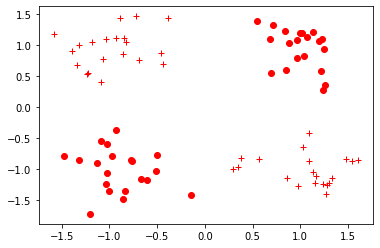

Before Training, test loss is 0.8778055906295776
Train loss at 0 is 0.7020236849784851
Train loss at 100 is 0.6473240256309509
Train loss at 200 is 0.5918306112289429
Train loss at 300 is 0.5144004821777344
Train loss at 400 is 0.4244416356086731
Train loss at 500 is 0.34364980459213257
Train loss at 600 is 0.2791162133216858
Train loss at 700 is 0.2309427261352539
Train loss at 800 is 0.1955493539571762
Train loss at 900 is 0.1696021556854248
Train loss at 1000 is 0.1501537263393402
Train loss at 1100 is 0.13518160581588745
Train loss at 1200 is 0.12341976165771484
Train loss at 1300 is 0.11400437355041504
Train loss at 1400 is 0.10631648451089859
Train loss at 1500 is 0.09994244575500488
Train loss at 1600 is 0.09457185864448547
Train loss at 1700 is 0.08998893201351166
Train loss at 1800 is 0.08603464066982269
Train loss at 1900 is 0.08258925378322601
After Training, test loss is 3.5307750701904297


In [40]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                              centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                            centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                            shuffle=True, cluster_std=0.3)


def label_map(y_, from_, to_):
  y = numpy.copy(y_)
  for f in from_:
    y[y_ == f] = to_
  return y

print(x_test)
print(y_test)

y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [2,3], 0)
y_test = label_map(y_test, [2,3], 1)

print(x_test)
print(y_test)


def vis_data(x,y = None, c = 'r'):
  if y is None:
    y = [None] * len(x)
  for x_, y_ in zip(x,y):
    if y_ is None:
      plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
    else:
      plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)





class NeuralNet(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size

    self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
    self.relu = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
    self.sigmoid = torch.nn.Sigmoid()

  def forward(self, input_tensor):
    linear1 = self.linear_1(input_tensor)
    relu = self.relu(linear1)
    linear2 = self.linear_2(relu)
    output = self.sigmoid(linear2)
    return output

model = NeuralNet(2,5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()

epochs = 2000

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

model.eval()  #평가모드

test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

for epoch in range(epochs):
  model.train()  #학습모드
  optimizer.zero_grad()
  train_output = model(x_train)
  train_loss = criterion(train_output.squeeze(), y_train)
  if epoch % 100 == 0:
    print('Train loss at {} is {}'.format(epoch, train_loss.item()))
  train_loss.backward()
  optimizer.step()  

model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))